In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

In [2]:
# Using IO module to read Audio Files
frequency_sampling, audio_signal = wavfile.read("/content/mahmud11.wav")

In [3]:
# visualizing signal shape,datatype and duration
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (46080, 2)
Signal Datatype: int16
Signal duration: 2.88 seconds


In [4]:
audio_signal = audio_signal / np.power(2, 15)

Amplitude VS Time(millisecond) graph

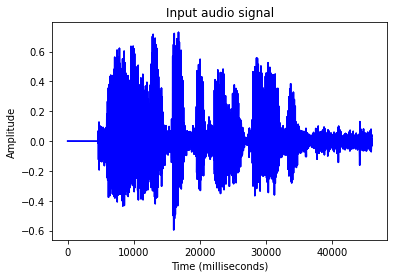

In [5]:
plt.plot(audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [6]:
# Extracting the length and the half-length of the signal to input to the foruier transform
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# using the Fourier Transform (FFT) to form the frequency domain of the signal
signal_frequency = np.fft.fft(audio_signal)

In [8]:
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2

In [9]:
len_fts = len(signal_frequency)

In [10]:
# Adjusting the Furier transformed signal for both even and odd cases
if length_signal % 2:
   signal_frequency[1:len_fts] *= 2
else:
   signal_frequency[1:len_fts-1] *= 2

In [11]:
signal_power = 10 * np.log10(signal_frequency)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [12]:
x_axis = np.arange(0, half_length, 1) * (frequency_sampling / length_signal) / 1000.0

Signal power(dB) VS Frequency graph

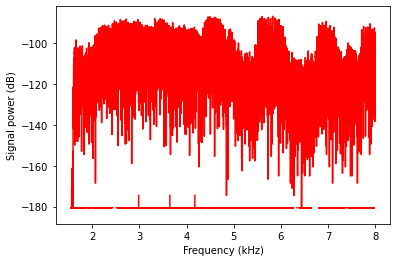

In [13]:
plt.figure()
plt.plot(x_axis, signal_power, color='red')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

importing libraries


In [14]:
! pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [15]:
import speech_recognition as sr
sr.__version__

'3.8.1'

In [16]:
r = sr.Recognizer()

loading my audio file

In [17]:
bangla1 = sr.AudioFile('/content/9.wav')

In [18]:
with bangla1 as source:
    audio = r.record(source)

In [19]:
type(audio)

speech_recognition.AudioData

hearing the audio file

In [20]:
filename = '/content/9.wav'
Audio(filename)

In [21]:
#using google web speech API
r.recognize_google(audio)

'act number package alcohol'

loading my audio file

In [22]:
bangla2 = sr.AudioFile('/content/2.wav')

In [23]:
with bangla2 as source:
    audio2 = r.record(source)

In [24]:
type(audio2)

speech_recognition.AudioData

hearing the audio file

In [25]:
filename2 = '/content/2.wav'
Audio(filename2)

recognizing the audio in text

In [27]:
r.recognize_google(audio,language = "bn-BN")

'এক নম্বর পাক্কা চালু করা হোক'